# **Load The Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Data_trainpath='/content/drive/MyDrive/Dataset/TRAIN_SET'

In [3]:
Data_testpath='/content/drive/MyDrive/Dataset/TEST_SET'

# **Image Preprocessing**

**Import The ImageDataGenerator Library**

In [4]:
from keras.preprocessing.image import ImageDataGenerator

**Configure ImageDataGenerator Class**

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

**Apply Image DataGenerator Functionality To Trainset And Testset**

In [7]:
x_train = train_datagen.flow_from_directory(Data_trainpath,target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 3388 images belonging to 3 classes.


In [8]:
x_test = train_datagen.flow_from_directory(Data_testpath,target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 929 images belonging to 3 classes.


In [9]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2}


In [10]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2}


In [11]:
from collections import Counter as c 
c(x_train .labels)

Counter({0: 995, 1: 1374, 2: 1019})

# **Model Building**

**Importing The Model Building Libraries**

In [12]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

**Initializing The Model**

In [13]:
model=Sequential()

**Adding CNN Layers**

First Convolution Layer and pooling

In [14]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Second Convolution Layer and pooling

In [15]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Flatten layer

In [16]:
model.add(Flatten())

**Adding Dense Layers**

In [17]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=5, activation='softmax')) 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

**Configure The Learning Process**

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

**Train The Model**

In [20]:
model.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=15, validation_data=x_test,validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
678/678 [==============================] - 1032s 2s/step - loss: 0.6563 - accuracy: 0.7358 - val_loss: 0.5077 - val_accuracy: 0.8019
Epoch 2/15
678/678 [==============================] - 40s 59ms/step - loss: 0.4958 - accuracy: 0.8105 - val_loss: 0.4646 - val_accuracy: 0.8138
Epoch 3/15
678/678 [==============================] - 37s 55ms/step - loss: 0.4596 - accuracy: 0.8205 - val_loss: 0.5185 - val_accuracy: 0.7761
Epoch 4/15
678/678 [==============================] - 37s 54ms/step - loss: 0.4293 - accuracy: 0.8297 - val_loss: 0.5085 - val_accuracy: 0.8084
Epoch 5/15
678/678 [==============================] - 39s 58ms/step - loss: 0.4104 - accuracy: 0.8338 - val_loss: 0.4118 - val_accuracy: 0.8375
Epoch 6/15
678/678 [==============================] - 40s 58ms/step - loss: 0.3796 - accuracy: 0.8563 - val_loss: 0.4090 - val_accuracy: 0.8418
Epoch 7/15
678/678 [==============================] - 38s 57ms/step - loss: 0.3710 - accuracy: 0.8568 - val_loss: 0.4093 - val_accuracy:

**Save The Model**

In [21]:
model.save('nutrition.h5')

**Test The Model**

In [22]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
final_model = load_model("nutrition.h5")

In [23]:
from tensorflow.keras.utils import img_to_array

In [24]:
img = tensorflow.keras.utils.load_img("/content/drive/MyDrive/Nutrition Image Analysis using CNN and Rapid API/Nutrition Analysis Using Image Classification/Flask/Sample_Images/Test_Image4.jpg",grayscale=False,target_size= (64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(final_model.predict(x),axis=1)
pred

1/1 [==============================] - 0s 103ms/step


array([2])

In [25]:
index=['APPLES', 'BANANA', 'ORANGE']
result=index[pred[0]]
result

'ORANGE'

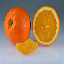

In [26]:
img

In [27]:
from google.colab import files
files.download("nutrition.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>